In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input director

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-23 13:28:17.450850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-23 13:28:17.451016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-23 13:28:17.630168: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Context

La pneumonie est une maladie du a une infections des poumons. les agents pathogène comme virus, les bactéries, des champignons ou d'autres micro-organismes en sont les princiaples cause. Elle se caractérise par un remplessement des sacs d'aires des poumons appelé alvéoles, qui peuvent se remplir de liquide, rendant ainsi la respiration difficile.
D'après l'OMS, la pneumonie est la première cause infectieuse de mortalité chez l’enfant à l’échelle mondiale. En 2019, 740 180 enfants de moins de 5 ans sont décédés des suites d’une pneumonie, soit 14 % de tous les décès survenus dans cette tranche d’âge ; chez les enfants de 1 à 5 ans, la pneumonie est responsable de 22 % des décès. 

Les fichiers de ces images sont sur kaggle, nous allons les accédés a travers leurs chement. Les fichiers sont organiser en trois dossier, qui sont test, train, val respectivement pour les données de test, d'entrainement et de validation de notre modèle. Nous allons commencer dans un premier temps á définir des variables correspondants a ces dossiers, puis après construire les dataframe correspondant en transfomant les fichiers images en données numerique.
Dans chaque dossier, se trouve deux sous-dossier, correspondant aux images normal et ceux ayant la pneunomie. On va parcouris les fichiers de chaque sous dossier, puis transformer le chifier image en tableau numerique a attribué une colonne qui peux prendre la valeur 0 ou 1 selon si l'image est normal ou anormal. Etand données que nous allons effectué cette même operation sur les trois dossier (test, train, et val), ce serait mieux de créer une fonction et la faire appèle en passant en paramètre le dossier correspondant.

In [2]:
test_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/"
train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train/"
val_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/"
def preparation(dossier): 
        X, y = [], []
        for i in ["NORMAL", "PNEUMONIA"]:
            chemin = dossier + i
            for file in os.listdir(chemin):
                chemin_fichier = os.path.join(chemin, file)
                if not chemin_fichier.endswith(".DS_Store"):
                    image = cv2.imread(chemin_fichier)
                    image = cv2.resize(image, (100, 100))
                    X.append(np.array(image))
                    if i=="NORMAL":
                        y.append(0)
                    else:
                        y.append(1)
        return np.array(X), np.array(y)
X_val, y_val = preparation(val_dir)
X_test, y_test = preparation(test_dir)
X_train, y_train = preparation(train_dir)

## Modèle utilisé

Le model que nous allons utilisé pour détècter la présence ou non de pneumonie sur l'image est le CNN(Convolutionnal Neural Network). C'est un réseaux de neuronnes qui á fait ces preuves en vision par ordinateur dans divers domaines inclus la médecine. Il est le mieux adapté pour notre problème. Le CNN  extrait les caractéristiques de l'objet en question en intégrant la notion faisant appel a une operation mathématique appelé une convolution, il intègre aussi de non linéareté pour capturé les relations non linéaire dans les images, là ou á échoué la pluspart des modèles traditionnelle de machine learning.
La mise en place de notre modèle est fait en utilisant la technique sequentielle de trensorflow. Pour rappel il y a deux manière de mètre en place les modèles du deep learning sur le plateforme de trensorflow, la manière sequentielle et fonctionnelle.
Nous utilisont un modèle d'une seul couche, on commence par ajouté la couche convolutionnaire avec un filtre de dimension (3,3) et pour fonction d'activation la fonction 'relu'. il faut aussi noté que notre image a trois cannaux correspondant au different cannaux de RGB, raison pour laquelle la dimension de notre image est de (100, 100, 3 )
Nous ajoutons ensuite, le Pooling consistant á reduire la dimension spatiale du resultat obtenue dans la couche convolutionnaire. Nous avons utilisé le Pooling maximum avec une fenêtre de (2, 2). 
Le resultat est enseuite vertorisé,puis classifier en utilisant la fonction sigmoid, retournant la probabilité que le l'image appartient a une classe ou l'autre.
La fonction d'optimisation 'adam' est utilisé avec cross entropy binaire commme la fonction de perte pour compiler le modèle

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
163/163 [==============================] - 25s 147ms/step - loss: 56.4652 - accuracy: 0.8591 - val_loss: 5.3427 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 23s 141ms/step - loss: 0.2842 - accuracy: 0.9563 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 3/20
163/163 [==============================] - 23s 138ms/step - loss: 0.2267 - accuracy: 0.9586 - val_loss: 0.5251 - val_accuracy: 0.9375
Epoch 4/20
163/163 [==============================] - 22s 136ms/step - loss: 0.1770 - accuracy: 0.9707 - val_loss: 0.2175 - val_accuracy: 0.9375
Epoch 5/20
163/163 [==============================] - 23s 139ms/step - loss: 0.2358 - accuracy: 0.9647 - val_loss: 1.4660 - val_accuracy: 0.8125
Epoch 6/20
163/163 [==============================] - 23s 139ms/step - loss: 0.0398 - accuracy: 0.9912 - val_loss: 1.4188 - val_accuracy: 0.8125
Epoch 7/20
163/163 [==============================] - 22s 137ms/step - loss: 0.0499 - accuracy: 0.9912 - val_loss: 1.1192 - val_a

Le modèle etant implementer, nous allons maintenant faire un test pour voir ci ca fonctionne bien sur des nouvelles observations

## Test du modèle

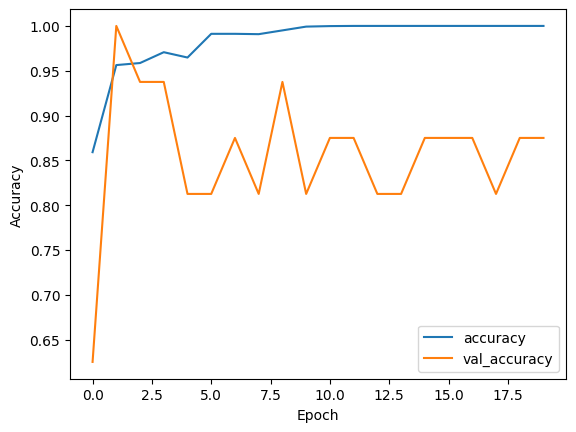

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [6]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

20/20 - 1s - loss: 6.0200 - accuracy: 0.7420 - 838ms/epoch - 42ms/step


## Resultat

Avec une seul couche, le model a une occurence de 73%, ce qui n'est pas mal mais c'est insuffisant. Il faut encore améliorer le model pour augmenter son occurence afin d'eviter les risques de detection faussent.